In [2]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt

In [3]:
#Note: our dark current is different than everyone else's (our group never opened the shutter on the CCD because they selected "dark" for the type of exposure)
bias = []
#Bias data
lamp_off = []
#Data when the neon or helium lamps are turned off
#With the telescope pointing in the other direction
nlamp_on = []
#Data when the neon lamp is turned on
hlamp_on = []
#Data when the helium lamp is turned on
sun_on = []
#Data when solar spectra are observed
sun_off = []
#Data when solar spectra are not observed (Dark exposures)
#With the dome closed

path = '/Users/jossherk/Desktop/lsa-ast361/Work/jossherk/astro-361-lab-6/'
#Defines a path to search for image files in

In [4]:
for i in range(45,55):
    bias.append(fits.getdata(path+'nov_7Bias'+"0"*(8-len(str(i)))+str(i)+'.fit', ext=0).astype(np.int))
    #Adds .fits files in the format nov_Bias7000000## to the list "bias"
avg_bias = np.asarray(bias).mean(axis=0)
#defines an average of the 3D Bias array about the axis 0

In [5]:
for i in range(55,58):
    lamp_off.append(fits.getdata(path+'nov_7'+"0"*(8-len(str(i)))+str(i)+'.fit', ext=0).astype(np.int))
    #Adds .fits files from nov_700000055 to nov_700000058 to the list "lamp_off"

In [6]:
for i in range(58,61):
    nlamp_on.append(fits.getdata(path+'nov_7'+"0"*(8-len(str(i)))+str(i)+'.fit', ext=0).astype(np.int))
    #Adds .fits files from nov_700000058 to nov_700000061 to the list "nlamp_on"

In [7]:
for i in range(61,63):
    hlamp_on.append(fits.getdata(path+'nov_7'+"0"*(8-len(str(i)))+str(i)+'.fit', ext=0).astype(np.int))
    #Adds .fits files from nov_700000061 to nov_700000063 to the list "hlamp_on"

In [8]:
for i in range(63,66):
    sun_on.append(fits.getdata(path+'nov_7'+"0"*(8-len(str(i)))+str(i)+'.fit', ext=0).astype(np.int))
    #Adds .fits files from nov_700000063 to nov_700000066 to the list "sun_on"

In [9]:
for i in range(66,69):
    sun_off.append(fits.getdata(path+'nov_7Dark'+"0"*(8-len(str(i)))+str(i)+'.fit', ext=0).astype(np.int))
    #Adds .fits files from nov_7Dark00000066 to nov_7Dark00000069 to the list "sun_off"

In [10]:
nlamp_sub_bias = [nlamp - avg_bias for nlamp in nlamp_on] 
hlamp_sub_bias = [hlamp - avg_bias for hlamp in hlamp_on]
sun_sub_bias = [sun - avg_bias for sun in sun_on]
sun_off_sub_bias = [sun - avg_bias for sun in sun_off]
lamp_off_sub_bias = [lamp - avg_bias for lamp in lamp_off]
#Corrects each value in the lists nlamp_on, hlamp_on, sun_on, lamp_off, and sun_off by subtracting the average bias 

avg_lamp_off = np.asarray(lamp_off_sub_bias).mean(axis=0) #As we've used previously, np.asarray() turns a list into an array. Then, an array can be acted on by .mean(axis=0) to take the mean along the specified axis 
avg_sun_off = np.asarray(sun_off_sub_bias).mean(axis=0)
#Takes the average values for the corrected lists "lamp_off" and "sun_off". This serves as our "background noise"

In [11]:
nlamp_corrected = [nlamp_on - avg_lamp_off for nlamp_on in nlamp_sub_bias]
hlamp_corrected = [hlamp_on - avg_lamp_off for hlamp_on in hlamp_sub_bias]
sun_corrected  = [sun_on - avg_sun_off for sun_on in sun_sub_bias]
#Subtracts background from sun and lamp_on lists for both neon and helium

avg_nlamp = np.asarray(nlamp_corrected).mean(axis=0)
avg_hlamp = np.asarray(hlamp_corrected).mean(axis=0)
avg_sun = np.asarray(sun_corrected).mean(axis=0)
#Defines arrays for the average neon and helium lamp and solar observations

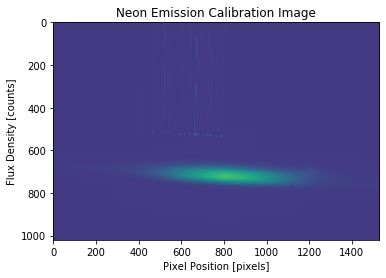

In [408]:
plt.imshow(avg_nlamp) 
plt.title('Neon Emission Calibration Image')
plt.xlabel('Pixel Position [pixels]')
plt.ylabel('Flux Density [counts]')
plt.show()
#This shows the image with the neon lamp on. You can see the spectral lines faintly

Text(0.5, 1.0, 'Neon Emission Calibration Spectrum')

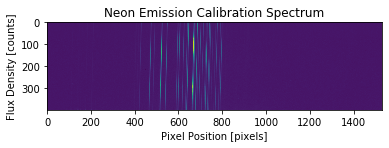

In [418]:
plt.imshow(avg_nlamp[100:500,:]) 
plt.xlabel('Pixel Position [pixels]')
plt.ylabel('Flux Density [counts]')
plt.title('Neon Emission Calibration Spectrum')
#This selects a y range from the above chart that isolates the spectral lines in their best intensity

In [396]:
plt.imshow(avg_hlamp) 
plt.title("Helium Emission Calibration Image")
plt.xlabel("Pixel Position [pixels]")
plt.ylabel("Flux Density [counts]")
plt.show() 
#This shows the image for the helium lamp on - you can once again faintly see the spectral lines

In [397]:
plt.imshow(avg_hlamp[300:500,:])
plt.xlabel('Pixel Position [pixels]')
plt.ylabel('Flux Density [counts]')
plt.title('Helium Emission Calibration Spectrum')
#The same can also be applied to the helium spectrum

Text(0.5, 1.0, 'Helium Emission Calibration Spectrum')

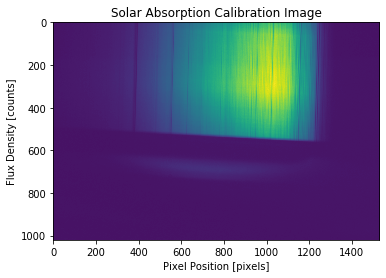

In [398]:
plt.imshow(avg_sun)
plt.title("Solar Absorption Calibration Image")
plt.xlabel("Pixel Position [pixels]")
plt.ylabel("Flux Density [counts]")
plt.show()
#This shows the image for the solar spectrum - the spectral lines are far easier to make out than the lamps

In [399]:
plt.title('Solar Absorption Calibration Spectrum)')
plt.xlabel('Pixel Position [pixels]')
plt.ylabel('Flux Density [counts]')
plt.imshow(avg_sun[150:500,:]) 

In [18]:
hlamp_good = np.asarray(avg_hlamp[400:500,:]).mean(axis=0)
nlamp_good = np.asarray(avg_nlamp[400:500,:]).mean(axis=0)
#This averages the value in each column of the range of helium and neon, provided the above diagrams indicated it was the range we wanted
sun_good  = np.asarray(avg_sun[400:500,:]).mean(axis=0)
#The same as with neon and helium is applied here

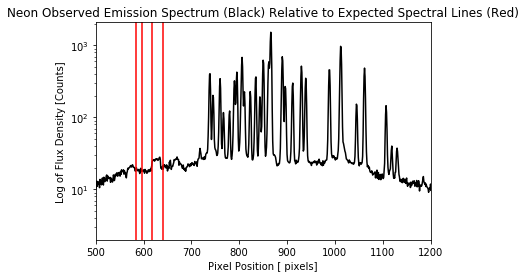

In [400]:
neon_lines = [585.2,597.5,618.2,640.2]
#neon_lines = [585.2,618.2,626.6,640.2,659.8,703.2]
#These are some high intensity spectral lines we would expect for neon per 
#http://portia.astrophysik.uni-kiel.de/~koeppen/discharge/neon.txt

plt.plot(np.flip(np.arange(len(nlamp_good)),0), nlamp_good, 'k-') #np.flip(~~~) reverses the array inside it.
for line in neon_lines:
    plt.axvline(line,color='r')
plt.xlabel('Pixel Position [ pixels]')
plt.ylabel('Log of Flux Density [Counts]')
plt.xlim(500,1200)
plt.yscale('log')
plt.title("Neon Observed Emission Spectrum (Black) Relative to Expected Spectral Lines (Red)")
plt.show()
#We see from the plot below that our observed spectral lines are clearly incorrect and therefore need to be shifted.
#We will then apply this same shift to our solar spectra

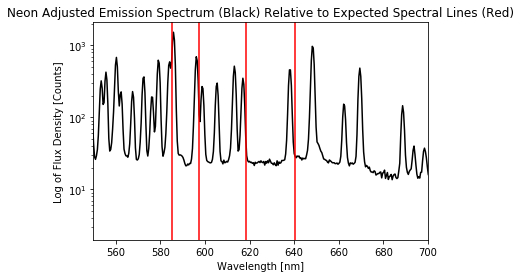

In [386]:
stretch = 0.426
shift = -217

#We experiment with several values of shift and stretch (starting with arbitrary values with the two highest intensity
#lines and adding more lines, adapting the stretch) until we find the optimium at 0.426,-217. The specific two lines
#we used to center the calibration were the 585.2 nm line (most intense on the spectrum) and 618.2 nm line

plt.plot(np.flip(np.arange(len(nlamp_good))*stretch-shift,0), nlamp_good, 'k-') #np.flip(~~~) reverses the array inside it.
for line in neon_lines:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Log of Flux Density [Counts]')
plt.xlim(550,700)
plt.yscale('log')
plt.title("Neon Adjusted Emission Spectrum (Black) Relative to Expected Spectral Lines (Red)")
plt.show()
#We have below our corrected spectrum for neon

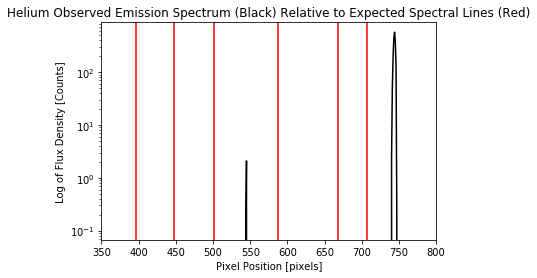

In [401]:
helium_lines = [396.7,447.1,501.5,587.5,667.8,706.5]
#These are the spectral lines we would expect for helium per 
#http://portia.astrophysik.uni-kiel.de/~koeppen/discharge/helium.txt

plt.plot(np.flip(np.arange(len(hlamp_good)),0), hlamp_good, 'k-') #np.flip(~~~) reverses the array inside it.
for line in helium_lines:
    plt.axvline(line,color='r')
plt.xlabel('Pixel Position [pixels]')
plt.xlim(350,800)
plt.yscale('log')
plt.ylabel('Log of Flux Density [Counts]')
plt.title("Helium Observed Emission Spectrum (Black) Relative to Expected Spectral Lines (Red)")
plt.show()
#We see once again from the plot for helium that our observed spectral lines are clearly incorrect and therefore need to
#be shifted

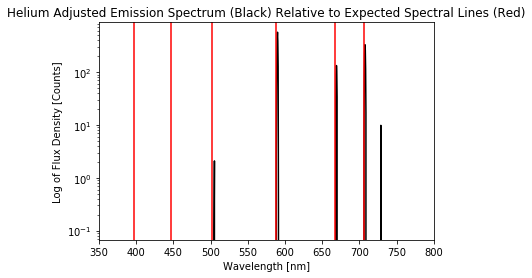

In [388]:
stretch2 = 0.426
shift2 = -273

#Used 587.5nm and 706.5nm lines (which are given as having the highest intensities in the spectrum
#to calibrate the graph)

helium_lines = [396.7,447.1,501.5,587.5,667.8,706.5]
#These are the spectral lines we would expect for helium per 
#http://portia.astrophysik.uni-kiel.de/~koeppen/discharge/helium.txt

plt.plot(np.flip(np.arange(len(hlamp_good))*stretch2-shift2,0), hlamp_good, 'k-') #np.flip(~~~) reverses the array inside it.
for line in helium_lines:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [nm]')
plt.xlim(350,800)
plt.yscale('log')
plt.ylabel('Log of Flux Density [Counts]')
plt.title("Helium Adjusted Emission Spectrum (Black) Relative to Expected Spectral Lines (Red)")
plt.show()
#We shift these lines by roughly the same value as we did with neon (with slight adjustments)

Text(0.5, 1.0, 'Solar Observed Flux Density vs. Pixel Position on CCD')

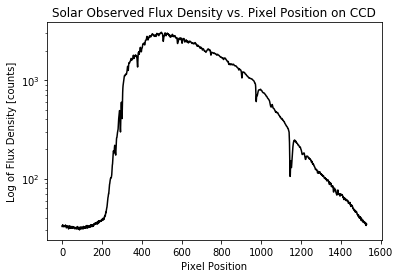

In [420]:
sun_lines = [430.7,495.7,527,589.6,686.7,759.3]
#Some solar Spectral lines per https://en.wikipedia.org/wiki/Fraunhofer_lines

plt.plot(np.flip(np.arange(len(sun_good)),0), sun_good, 'k-') #np.flip(~~~) reverses the array inside it.
#for line in sun_lines:
    #plt.axvline(line,color='r')
plt.yscale('log')
plt.xlabel('Pixel Position')
plt.ylabel('Log of Flux Density [counts]')
plt.title('Solar Observed Flux Density vs. Pixel Position on CCD')
    #We note that once again, these lines are not correct and we must use known lines to calibrate them

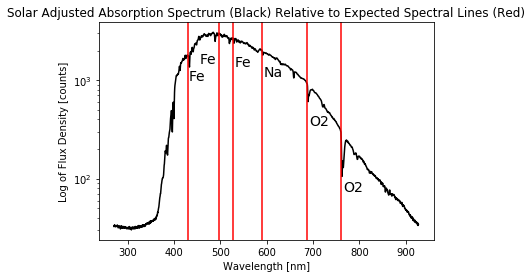

In [390]:
stretch3 = 0.43
shift3 = -270

#Given that we are calibrating the CCD, we expect that using roughly the same scale as for neon and helium should
#yield a proper calibration along the x axis. We note that our lines for 759.3 nm and 700 nm are where we expect 
#them to be relative to their intensities

#Per wikipedia, the following absorption lines are associated with the following elements:
#430.7 Fe
#495.7 Fe
#527 Fe
#589.6 Na
#686.7 O2
#759.3 O2
#We label these points below

plt.annotate('Fe', xy = (430.7,1000), fontsize = 14)
plt.annotate('Fe', xy = (455,1500), fontsize = 14)
plt.annotate('Fe', xy = (530,1400), fontsize = 14)
plt.annotate('Na', xy = (593,1100), fontsize = 14)
plt.annotate('O2', xy = (692,350), fontsize = 14)
plt.annotate('O2', xy = (765,75), fontsize = 14)

#Note that the points are not exact so the labels don't overlap with the absorption lines

plt.plot(np.flip(np.arange(len(sun_good))*stretch3 - shift3,0), sun_good, 'k-') #np.flip(~~~) reverses the array inside it.
for line in sun_lines:
    plt.axvline(line,color='r')
    plt.yscale('log')
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Log of Flux Density [counts]')
    plt.title('Solar Adjusted Absorption Spectrum (Black) Relative to Expected Spectral Lines (Red)')